# Experiments with WCDS
This notebook contains all experiments that are done using WCDS.

In [10]:
import matplotlib.pyplot as plt
from wcds.wcds import WCDS
from wcds.clusterers import *
from sklearn.preprocessing import minmax_scale, MinMaxScaler, LabelEncoder
from sklearn.metrics import *
from scipy.io import arff
import pandas as pd
import numpy as np
import random
import math
import time

## Datasets
In the following sections `datastream` will be the variable storing the current datastream. It uses a pandas dataframe for that. The last column contains the instance's class.

By executing one of the following cells, the chosen dataset/-stream will be loaded.

In [2]:
# Complex8
url = "http://www2.cs.uh.edu/~ml_kdd/restored/Complex&Diamond/Complex8.data"
datastream = pd.read_csv(url, names=['X', 'Y', "Class"], header=None)
datastream["X"] = minmax_scale(datastream["X"])
datastream["Y"] = minmax_scale(datastream["Y"])
datastream = datastream.sample(frac=1).reset_index(drop=True)

In [ ]:
# Complex9
url = "http://www2.cs.uh.edu/~ml_kdd/restored/Complex&Diamond/Complex9.txt"
datastream = pd.read_csv(url, names=['X', 'Y', "Class"], header=None)
datastream["X"] = minmax_scale(datastream["X"])
datastream["Y"] = minmax_scale(datastream["Y"])
datastream = datastream.sample(frac=1).reset_index(drop=True)

In [ ]:
# D31
url = "http://cs.joensuu.fi/sipu/datasets/D31.txt"
datastream = pd.read_csv(url, names=['X', 'Y', "Class"], header=None, sep="\t")
datastream["X"] = minmax_scale(datastream["X"])
datastream["Y"] = minmax_scale(datastream["Y"])
datastream = datastream.sample(frac=1).reset_index(drop=True)

In [ ]:
# Jain
url = "http://cs.joensuu.fi/sipu/datasets/jain.txt"
datastream = pd.read_csv(url, names=['X', 'Y', "Class"], header=None, sep="\t")
datastream["X"] = minmax_scale(datastream["X"])
datastream["Y"] = minmax_scale(datastream["Y"])
datastream = datastream.sample(frac=1).reset_index(drop=True)

In [ ]:
# Agglomeration
url = "http://cs.joensuu.fi/sipu/datasets/Aggregation.txt"
datastream = pd.read_csv(url, names=['X', 'Y', "Class"], header=None, sep="\t")
datastream["X"] = minmax_scale(datastream["X"])
datastream["Y"] = minmax_scale(datastream["Y"])
datastream = datastream.sample(frac=1).reset_index(drop=True)

In [ ]:
# Forest Cover Type
data = arff.loadarff('../Datasets/covtypeNorm.arff')
datastream = pd.DataFrame(data[0])
labels = datastream["class"].astype(int)
datastream = datastream.select_dtypes(exclude="O")
datastream["Class"] = labels

In [ ]:
# 10% of Network Intrusion Detection (KDD Cup 1999)
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
header = ["duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "Class"]
datastream = pd.read_csv(url, names=header, header=None)
label_encoder = LabelEncoder() 
classes = label_encoder.fit_transform(datastream['Class']) 
datastream = datastream.select_dtypes(exclude=["object"])
datastream = datastream.drop(columns=["land", "logged_in", "is_host_login", "is_guest_login"])
scaler = MinMaxScaler()
datastream = pd.DataFrame(scaler.fit_transform(datastream), columns=datastream.columns)
datastream["Class"] = classes

In [ ]:
# SEA Concepts
datastream = pd.read_csv("../Datasets/sea.data", header=None)
labels = datastream.iloc[:, 3]
datastream = datastream.drop(columns=[3])
scaler = MinMaxScaler()
datastream = pd.DataFrame(scaler.fit_transform(datastream), columns=datastream.columns)
datastream["Class"] = labels

In [ ]:
# Gas mixture dataset CO2
# TODO

In [ ]:
# Zip link to  Gas sensor array under dynamic gas mixtures Data Set 
"http://archive.ics.uci.edu/ml/machine-learning-databases/00322/data.zip"

In [ ]:
#  Gas mixture dataset ETHYLNEE
# TODO

In [ ]:
# SAM KNN DATASETS
# TODO

Take a look at the first rows of the dataset and its description.

In [3]:
datastream.head()

,X,Y,Class
0,0.777187,0.091665,7
1,0.502467,0.859805,6
2,0.453570,0.982700,6
3,0.633803,0.963872,6
4,0.224262,0.575016,2


In [4]:
datastream.describe()

,X,Y,Class
count,2551.000000,2551.000000,2551.000000
mean,0.472706,0.476395,4.303018
std,0.280525,0.295910,2.002427
min,0.000000,0.000000,0.000000
25%,0.234144,0.197300,3.000000
50%,0.451110,0.518932,5.000000
75%,0.697789,0.715997,6.000000
max,1.000000,1.000000,7.000000


## Online clustering
The next step, is to perform the online step of stream clustering with WCDS on the previous selected `datastream`.

In [3]:
%%time

# Parameters
OMEGA = 3000
DELTA = 10
GAMMA = 20
EPSILON = 0.8
DIM = len(datastream.iloc[0])-1
µ = 1

# Clusterer instance
c_online = WCDS(
    omega=OMEGA,
    delta=DELTA,
    gamma=GAMMA,
    epsilon=EPSILON,
    dimension=DIM,
    µ=µ)

c_offline = AgglomerativeClustering()
assigned_discriminators = []
amount = []
time_ = 0

for i in range(len(datastream)):
    k = c_online.record(list(datastream.iloc[i])[:-1], time_)
    amount.append(len(c_online.discriminators))
    time_ += 1
    assigned_discriminators.append(k)

Wall time: 9.61 s


In [ ]:
%matplotlib notebook
plt.plot(datastream["Class"])
plt.plot(amount)

In [ ]:
means = [np.mean(datastream["Class"][i:i+200]) for i in range(len(datastream)-101)]

In [ ]:
plt.plot(means)

In [ ]:
# Optional save
c_online.save()

## Offline clustering
Now we perform offline clustering on the current configuration of WCDS.

In [ ]:
N_CLUSTERS = 8
THRESHOLD = None

In [17]:
%%time

c_offline = MergeClustering(n_clusters=N_CLUSTERS, distance_threshold=THRESHOLD)
actual_clusters1 = c_offline.fit(c_online.discriminators)

Wall time: 569 ms


In [18]:
%%time

c_offline = MinDistanceClustering(n_clusters=N_CLUSTERS, distance_threshold=THRESHOLD)
actual_clusters2 = c_offline.fit(c_online.discriminators)

Wall time: 307 ms


In [19]:
%%time
# use single linkage? or average?

c_offline = CentroidClustering(n_clusters=N_CLUSTERS, distance_threshold=THRESHOLD)
centroids = [c_online.centroid(d) for d in c_online.discriminators.values()]
actual_clusters3 = c_offline.fit(c_online.discriminators, centroids)

Wall time: 23 ms


## Plot results and evaluate clustering

In [ ]:
predicted_discriminators = []
time_ = 0

for x, y in zip(datastream["X"], datastream["Y"]):
    k = c_online.record((x, y), time_)
    time_ += 1
    predicted_discriminators.append(k)

In [6]:
# Initialize color list
number_of_colors = len(c_online.discriminators)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]
color_dict = {key: value for (key, value) in enumerate(colors)}

In [7]:
def return_correct(index, clustering):
    # Returns correct offline cluster for given discriminator
    for i in range(len(clustering)):
        if index in clustering[i]:
            return i

Text(0.5, 0.98, 'Centroids')

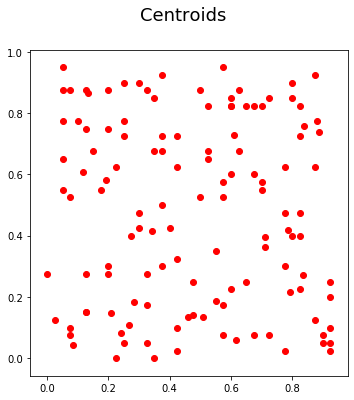

In [23]:
# Plot centroids
%matplotlib inline

plt.figure(5, figsize=(6,6))        
plt.scatter([centroid[0] for centroid in centroids], [centroid[1] for centroid in centroids], marker="o", color="red")
plt.axis('scaled', xlim=[0, 1, 0, 1])
plt.suptitle('Centroids', fontsize=18)

Found 125 Microclusters and formed 8 Clusters.


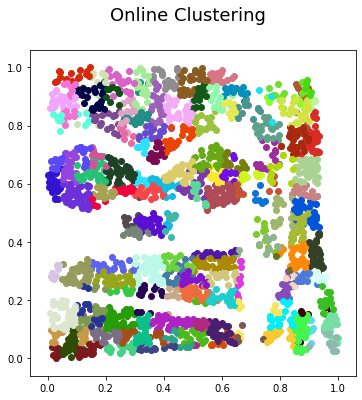

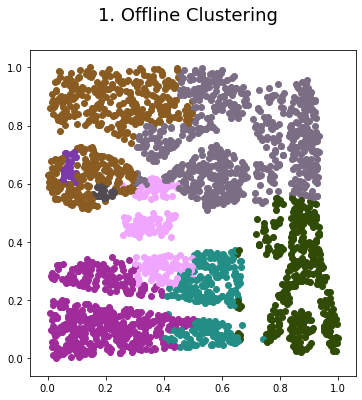

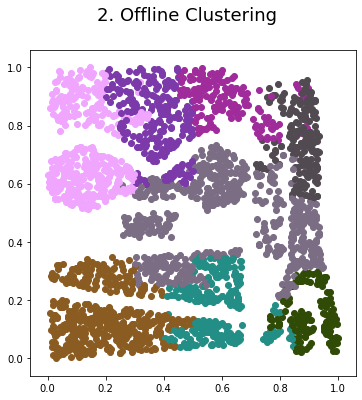

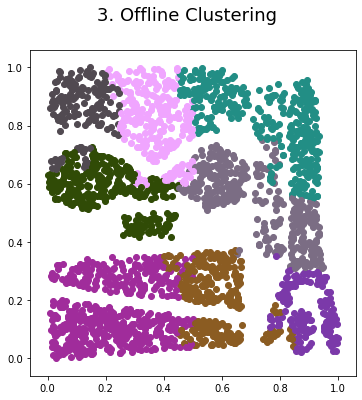

In [21]:
# Plot results of online vs offline clustering
%matplotlib inline

# Online
plt.figure(1, figsize=(6,6))
for i in range(len(assigned_discriminators)):
    k = assigned_discriminators[i]
    plt.scatter(datastream["X"][i], datastream["Y"][i], marker="o", color=color_dict[int(k)])
    plt.axis('scaled', xlim=[0, 1, 0, 1])
plt.suptitle('Online Clustering', fontsize=18)
    
# Offline1
plt.figure(2, figsize=(6,6))        
for i in range(len(assigned_discriminators)):
    k = assigned_discriminators[i]
    correct = return_correct(k, actual_clusters1)
    plt.scatter(datastream["X"][i], datastream["Y"][i], marker="o", color=color_dict[correct])
plt.axis('scaled', xlim=[0, 1, 0, 1])
plt.suptitle('1. Offline Clustering', fontsize=18)

# Offline2
plt.figure(3, figsize=(6,6))        
for i in range(len(assigned_discriminators)):
    k = assigned_discriminators[i]
    correct = return_correct(k, actual_clusters2)
    plt.scatter(datastream["X"][i], datastream["Y"][i], marker="o", color=color_dict[correct])
plt.axis('scaled', xlim=[0, 1, 0, 1])
plt.suptitle('2. Offline Clustering', fontsize=18)

# Offline3
plt.figure(4, figsize=(6,6))        
for i in range(len(assigned_discriminators)):
    k = assigned_discriminators[i]
    correct = return_correct(k, actual_clusters3)
    plt.scatter(datastream["X"][i], datastream["Y"][i], marker="o", color=color_dict[correct])
plt.axis('scaled', xlim=[0, 1, 0, 1])
plt.suptitle('3. Offline Clustering', fontsize=18)
    
print("Found {} Microclusters and formed {} Clusters.".format(len(c_online.discriminators), len(actual_clusters)))
plt.show()

In [22]:
# Calculate Homogeneity, Completeness, V-Measure of clusterings
print("Homogeneity, Completeness, V-Measure")

# Online
print("Online: ", homogeneity_completeness_v_measure(datastream["Class"], assigned_discriminators))

# Offline
print("Offline: ", homogeneity_completeness_v_measure(datastream["Class"], [return_correct(assigned_discriminators[i], actual_clusters1) for i in range(len(assigned_discriminators))]))
print("Offline: ", homogeneity_completeness_v_measure(datastream["Class"], [return_correct(assigned_discriminators[i], actual_clusters2) for i in range(len(assigned_discriminators))]))
print("Offline: ", homogeneity_completeness_v_measure(datastream["Class"], [return_correct(assigned_discriminators[i], actual_clusters3) for i in range(len(assigned_discriminators))]))

Homogeneity, Completeness, V-Measure
Online:  (0.9509592257576092, 0.3763327818328329, 0.5392590760621637)
Offline:  (0.5278959912225851, 0.5516141179054921, 0.5394944967755614)
Offline:  (0.5469864447471992, 0.5175615460451557, 0.5318673323471113)
Offline:  (0.6051417132920657, 0.5610325464881881, 0.5822529412687373)


The following cell visualizes the behavior of the online clustering over time. 

In [ ]:
# Live online clustering plot
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.ion()
ax.axis('scaled', xlim=[0, 1, 0, 1])
fig.show()
fig.canvas.draw()

for i in range(len(assigned_discriminators)):
    k = assigned_discriminators[i]
    ax.scatter(datastream["X"][i], datastream["Y"][i], marker="o", color=color_dict[int(k)])
    fig.canvas.draw()

In [ ]:
# Show discriminator bubble
from matplotlib import cm
cm_subsection = np.linspace(0.0, 1.0, 1000)
colormap = cm.get_cmap("viridis")
colors = [colormap(x) for x in cm_subsection]

def plot_discriminator(c_id, step=0.01):
    points = []
    border = []
    
    for i in np.arange(0,1,step):
        for j in np.arange(0,1,step):
            matching_rate = c_online.discriminators[c_id].matching(c_online.addressing((i,j)))
            c = colors[round(matching_rate*999)]
            if abs(c_online.epsilon - matching_rate) < 0.015:
                border.append((((i,j), "black")))
            points.append(((i,j), c))
    # Plot heat map
    plt.scatter([point[0][0] for point in points], [point[0][1] for point in points], marker="s", s=1, c=[point[1] for point in points])
    # Plot epsilon border
    plt.scatter([point[0][0] for point in border], [point[0][1] for point in border], marker="o", s=1, c=[point[1] for point in border])
    # Plot points assigned to discriminator
    plt.scatter([datastream["X"][i] for i in range(len(assigned_discriminators)) if assigned_discriminators[i] == c_id],
                [datastream["Y"][i] for i in range(len(assigned_discriminators)) if assigned_discriminators[i] == c_id],
                marker="X", s=2, color="blue")
    plt.scatter(c_online.centroid(c_id)[0], c_online.centroid(c_id)[1], marker="X", s=10, color="red")
    plt.axis('scaled', xlim=[0, 1, 0, 1])
    #plt.colorbar(colors)
    plt.show()

In [ ]:
def plot_descision_boundaries(step=0.01):
    points = []
    
    for i in np.arange(0,1,step):
        for j in np.arange(0,1,step):
            matching_rate = c_online.discriminators[c_id].matching(c_online.addressing((i,j)))
            c = colors[round(matching_rate*999)]
            if abs(c_online.epsilon - matching_rate) < 0.015:
                border.append((((i,j), "black")))
            points.append(((i,j), c))
    # Plot points assigned to discriminator
    plt.scatter([datastream["X"][i] for i in range(len(assigned_discriminators)) if assigned_discriminators[i] == c_id],
                [datastream["Y"][i] for i in range(len(assigned_discriminators)) if assigned_discriminators[i] == c_id],
                marker="X", s=2, color="white")
    plt.axis('scaled', xlim=[0, 1, 0, 1])
    #plt.colorbar(colors)
    plt.show()

## Results

Gamma: Resolution of binary encoding; unterteilt jede dimension in gamma subräume/abschnitte
Je höher, desto kleiner die epsilon area.

Delta: Bestimmt anzahl der Neuronen; Gibt an wie viele verschiedene Epsilonzonen es gibt (ohne 0%)
Je höher, desto größer die epsilon area.

Area gelichbeliben bei gelichem gamm delta verhältnis?!